### Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import hauer

In [2]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 500)

### Naïve BA

In [23]:
# Numerical Example 7.2. Differing ratios of duration (pg 78)
# Dataset
df = pd.DataFrame()
df['treatment_before_duration'] = [3,3,2,2,1]
df['treatment_after_duration'] = [1,1,1,1,1]
df['treatment_before_count'] = [31,23,7,8,5]
df['treatment_after_count'] = [7,4,1,5,7]

# Run
df_modified, result = hauer.NaiveBeforeAfter(df)

result

C:\Users\thiag\OneDrive\Documents\Repositórios (Local)\hauer-before-after\hauer.py:240: RuntimeWarning: invalid value encountered in scalar power
  std_teta_vte = var_teta_vte**0.5


,NAive BA
lambda,24.000000
var_lambda,24.000000
std_lambda,4.898979
pi,30.500000
var_pi,14.750000
std_pi,3.840573
delta,6.500000
delta_norm,1.300000
var_delta,38.750000
std_delta,6.224950


### Comparison Group BA

In [25]:
# Numerical Example 9.3. R.I.D.E. with comparison groups.
df_t= pd.DataFrame()
df_t['treatment_before_duration'] = [1]
df_t['treatment_after_duration'] = [1]
df_t['treatment_before_count'] = [173]
df_t['treatment_after_count'] = [144]

df_cg = pd.DataFrame()
df_cg['comparison_group_before_duration'] = [1]
df_cg['comparison_group_after_duration'] = [1]
df_cg['comparison_group_before_count'] = [897]
df_cg['comparison_group_after_count'] = [870]

df_t_modified, df_cg_modified, result = hauer.ComparisonGroupBeforeAfter(df_t,df_cg,var_w_par=0.0055)

result

,CG BA
K,173.000000
L,144.000000
M,897.000000
N,870.000000
rt,0.968820
var_rt/rt2,0.007764
var_w,0.005500
lambda,144.000000
var_lambda,144.000000
std_lambda,12.000000


### Comparison Methods

In [35]:
# Numerical Example 9.3. R.I.D.E. with comparison groups.
# Naive BA
df = pd.DataFrame()
df['treatment_before_duration'] = [1]
df['treatment_after_duration'] = [1]
df['treatment_before_count'] = [173]
df['treatment_after_count'] = [144]
_, result_Naive_BA = hauer.NaiveBeforeAfter(df)

# CG BA
df_t= pd.DataFrame()
df_t['treatment_before_duration'] = [1]
df_t['treatment_after_duration'] = [1]
df_t['treatment_before_count'] = [173]
df_t['treatment_after_count'] = [144]
df_cg = pd.DataFrame()
df_cg['comparison_group_before_duration'] = [1]
df_cg['comparison_group_after_duration'] = [1]
df_cg['comparison_group_before_count'] = [897]
df_cg['comparison_group_after_count'] = [870]
_,_, result_CG_BA = hauer.ComparisonGroupBeforeAfter(df_t,df_cg,var_w_par=0.0055)

result = pd.concat([result_Naive_BA.T,result_CG_BA.T],ignore_index=True).T
result.columns = ["Naive BA","CG BA"]
result

,Naive BA,CG BA
lambda,144.000000,144.000000
var_lambda,144.000000,144.000000
std_lambda,12.000000,12.000000
pi,173.000000,167.605791
var_pi,173.000000,380.490835
std_pi,13.152946,19.506174
delta,29.000000,23.605791
delta_norm,29.000000,23.605791
var_delta,317.000000,524.490835
std_delta,17.804494,22.901765


### Class Examples

In [6]:
"""
Coelho et al, 2008
https://www.sinaldetransito.com.br/artigos/semaforos_x_acidentes.pdf
"""
df = pd.DataFrame()
df["Semáforo"] = [470,472,473,476,477,478,479,480,481,482,483,484,485,486,487,488]
df["Período Antes"] = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
df["Sinistros Antes"] = [20, 15, 1, 13, 8, 11, 5, 12, 8, 6, 3, 1, 10, 10, 11, 2]
df["Período Depois"] = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
df["Sinistros Depois"] = [16, 8, 1, 11, 16, 33, 10, 10, 17, 15, 13, 7, 11, 6, 20, 3]

_, result = hauer.NaiveBeforeAfter(df,'Período Antes','Período Depois','Sinistros Antes','Sinistros Depois')

result

,NAive BA
lambda,197.000000
var_lambda,197.000000
std_lambda,14.035669
pi,136.000000
var_pi,136.000000
std_pi,11.661904
delta,-61.000000
delta_norm,-1.906250
var_delta,333.000000
std_delta,18.248288


### EB Examples

In [10]:
df = pd.DataFrame()
df["entity"] = ["unique"]
df["treatment_before_duration"] = [56]
df["treatment_after_duration"] = [38]
df['treatment_before_count'] = [34]
df['treatment_after_count'] = [14]

# SPF
df_SPF = pd.DataFrame()
# Duration
df_SPF["reference"] = ["1990","1991","1992","1993","Jan-Aug 1994","Nov-Dec 1994","1995","1996","1997"]
df_SPF["period"] = ["before","before","before","before","before","after","after","after","after"]
df_SPF["duration"] = [1,1,1,1,8/12,2/12,1,1,1]
df_SPF.insert(0,"entity","unique")

# Function
SPF = lambda alpha,major_AADT,minor_AADT,duration=1:[duration*alpha*(major_AADT**0.256)*(minor_AADT**0.831),0.25]
df_SPF["alpha"]= [0.000383, 0.000388, 0.000392, 0.000358, 0.000391, 0.000391, 0.000389, 0.000362, 0.000367]
df_SPF["major_AADT"] = [10228, 10441, 10761, 10867, 10974, 12076, 11597, 11836, 12315]
df_SPF["minor_AADT"] = [4503, 4597, 4738, 4785, 4832, 5317, 5106, 5211, 5422]

# Inc Estimated
df_SPF[["tau_par","b"]] = df_SPF.apply(lambda row: SPF(row["alpha"],row["major_AADT"],row["minor_AADT"],row["duration"]),axis=1,result_type="expand")
df_SPF_agg = df_SPF.groupby(["entity","period"]).agg({"tau_par":"sum","b":"mean"}).reset_index(drop=False)
df_SPF_agg["var_tau_par"] = df_SPF_agg["b"]*(df_SPF_agg["tau_par"]**2)

df_SPF_agg_before = df_SPF_agg[df_SPF_agg["period"]=="before"][["entity","tau_par","b","var_tau_par"]]
df_SPF_agg_before.columns = ["entity","tau_par_before","b","var_tau_par_before"]
df_SPF_agg_after = df_SPF_agg[df_SPF_agg["period"]=="after"][["entity","tau_par","var_tau_par"]]
df_SPF_agg_after.columns = ["entity","tau_par_after","var_tau_par_after"]

df = df.merge(df_SPF_agg_before,on="entity",how="left")
df = df.merge(df_SPF_agg_after,on="entity",how="left")

E_k_K = lambda alpha_weight,k,K:(alpha_weight*k) + ((1-alpha_weight)*K)
df["alpha_weight"] = 1/(1+(df["var_tau_par_before"]/df["tau_par_before"]))
df["E_k_K_par"] = df.apply(lambda row:E_k_K(row["alpha_weight"],row["tau_par_before"],row["treatment_before_count"]),axis=1)

df

,entity,treatment_before_duration,treatment_after_duration,treatment_before_count,treatment_after_count,tau_par_before,b,var_tau_par_before,tau_par_after,var_tau_par_after,alpha_weight,E_k_K_par
0,unique,56,38,34,14,21.458358,0.25,115.115287,16.138997,65.116803,0.157119,32.029466


### TP1

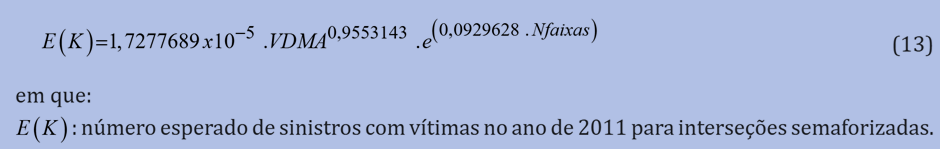

In [78]:
def SPF_TLI_Injured(df_SPF,year_col="year",Ct_col="Ct",inj_col="inj"):
    """
    Inputs: 
        AADV - VMDA da interseção (soma das aproximações)
        num_lanes - Total de faixas na inteseção
        Ct - Ajuste de calibração temporal das FDSV
    Output:
        Total de sinistros com vítimas esperados por ano em uma interseção semaforizada em 2011 ou o ano ajustado por Ct
    """
    year_ref = 2011
    intercept_yr = 1.7277689*0.00001
    inj_yr = df_SPF[df_SPF[year_col]==year_ref][inj_col].values[0]
    
    df_SPF[Ct_col] = df_SPF[inj_col]/inj_yr
    df_SPF["INTERCEPTO"] = intercept_yr*df_SPF[Ct_col]
    
    df_SPF_dict = df_SPF[Ct_col]
    df_SPF_dict.index = df_SPF[year_col]
    df_SPF_dict = df_SPF_dict.to_dict()
    
    E_k = lambda pars:df_SPF_dict[pars[0]]*(1.7277689*0.00001)*(pars[1]**0.9553143)*np.exp(0.0929628*pars[2])
    b = 11.2
    
    return E_k,b

In [99]:
def ExpandDatasetToMEB_Months(
    df,
    start_year,
    end_year,
    buffer_after_day_zero=0,
    fmd=1,
    before_duration="treatment_before_duration",
    after_duration="treatment_after_duration",
    day_zero="day_zero",
    sep="@"):
    """
    fmd is the Factor Multi Durantion from months to other time units such as year (fmd = 1/12)
    """

    df = df.copy()

    df["start_before"] = df.apply(lambda row: row[day_zero] - pd.DateOffset(months=row[before_duration]), axis=1)
    df["end_before"] = df.apply(lambda row: row[day_zero] - pd.DateOffset(days=1), axis=1)
    df["start_after"] = df.apply(lambda row: row[day_zero] + pd.DateOffset(months=buffer_after_day_zero), axis=1)
    df["end_after"] = df.apply(lambda row: row["start_after"] + pd.DateOffset(months=row[after_duration]), axis=1)

    for y in range(start_year,end_year+1):
        if (y % 4 == 0 and y % 100 != 0) or (y % 400 == 0):
            year_to_days = 366
        else:
            year_to_days = 365
        
        start_date = pd.Timestamp(f'{y}-01-01')
        end_date = pd.Timestamp(f'{y}-12-31')
    
        # Beafore
        start = df["start_before"].apply(lambda x:max(start_date,x))
        end = df["end_before"].apply(lambda x:min(end_date,x))
    
        df[before_duration+sep+str(y)] = (end - start)
        df[before_duration+sep+str(y)] = df[before_duration+sep+str(y)].apply(lambda x:x + pd.Timedelta(days=1) if x > pd.Timedelta(days=0) else pd.Timedelta(days=0))
        df[before_duration+sep+str(y)] = df[before_duration+sep+str(y)].astype('int64')/1e9 # nanosec to sec
        df[before_duration+sep+str(y)] = df[before_duration+sep+str(y)]/(year_to_days*24*60*60/12) # sec to months
        df[before_duration+sep+str(y)] = df[before_duration+sep+str(y)]*fmd # factor multi duration

        start = df["start_after"].apply(lambda x:max(start_date,x))
        end = df["end_after"].apply(lambda x:min(end_date,x))
    
        df[after_duration+sep+str(y)] = (end - start)
        df[after_duration+sep+str(y)] = df[after_duration+sep+str(y)].apply(lambda x:x + pd.Timedelta(days=1) if x > pd.Timedelta(days=0) else pd.Timedelta(days=0))
        df[after_duration+sep+str(y)] = df[after_duration+sep+str(y)].astype('int64')/1e9 # nanosec to sec
        df[after_duration+sep+str(y)] = df[after_duration+sep+str(y)]/(year_to_days*24*60*60/12) # sec to months
        df[after_duration+sep+str(y)] = df[after_duration+sep+str(y)]*fmd # factor multi duration

    return df

In [98]:
def EmpiricalBayesMethod(
    df_treatment,
    SPF_func,
    b,
    par_list,
    start_year,
    end_year,
    before_duration="treatment_before_duration",
    after_duration="treatment_after_duration",
    before_count="treatment_before_count",
    after_count="treatment_after_count",
    sep="@"):

    df_treatment = df_treatment.copy()

    # MEB
    accident_before_SPF_cols= []
    accident_after_SPF_cols = []
    
    for y in range(start_year,end_year+1):
        df_treatment[f"accident_func_SPF"+sep+str(y)] = df_treatment.apply(lambda row:SPF_func([y]+[row[par+sep+str(y)] for par in par_list]),axis=1)

        df_treatment["accident_before_SPF"+sep+str(y)] = df_treatment[before_duration+sep+str(y)] * df_treatment[f"accident_func_SPF"+sep+str(y)]
        accident_before_SPF_cols.append("accident_before_SPF"+sep+str(y))

        df_treatment["accident_after_SPF"+sep+str(y)] = df_treatment[after_duration+sep+str(y)] * df_treatment[f"accident_func_SPF"+sep+str(y)]
        accident_after_SPF_cols.append("accident_after_SPF"+sep+str(y))

    df_treatment["Ekb SPF"] = df_treatment[accident_before_SPF_cols].sum(axis=1)
    df_treatment["Eka SPF"] = df_treatment[accident_after_SPF_cols].sum(axis=1)
    
    df_treatment["VAR_Ek SPF"] = b*(df_treatment["Ekb SPF"]**2)
    
    df_treatment["alpha"] = 1/(1+(df_treatment["VAR_Ek SPF"]/df_treatment["Eka SPF"]))
    
    df_treatment["k_par"] = (df_treatment["alpha"]*df_treatment["Ekb SPF"])+((1-df_treatment["alpha"])*df_treatment[before_count])
    df_treatment["var_k_par"] = (1-df_treatment["alpha"])*df_treatment["k_par"]
    
    df_treatment["rC"] = df_treatment["Eka SPF"]/df_treatment["Ekb SPF"]
    df_treatment["pi_par"] = df_treatment["rC"]*df_treatment["k_par"]
    df_treatment["var_pi_par"] = (df_treatment["rC"]**2)*df_treatment["var_k_par"]

    # 4-steps
    # Step 1
    lambda_par = sum(df_treatment[after_count]) # estimated after with treatment
    
    pi_par = sum(df_treatment["pi_par"])# predict without treatment
    
    # Step 2 
    var_lambda_par = sum(df_treatment[after_count]) # assumed to be Poisson distributed
    std_lambda_par = var_lambda_par**0.5
    
    var_pi_par = sum(df_treatment["var_pi_par"])
    std_pi_par = var_pi_par**0.5
    
    # Step 3
    delta_par = pi_par - lambda_par
    delta_norm_par = delta_par/sum(df_treatment[after_duration])
    
    teta_par = (lambda_par/pi_par) / (1+(var_pi_par/(pi_par**2)))
    
    # Step 4
    var_delta_par = var_lambda_par + var_pi_par
    std_delta_par = var_delta_par**0.5
    
    var_teta_par = (teta_par**2)*((var_lambda_par/(lambda_par**2))+(var_pi_par/(pi_par**2)))/((1+(var_pi_par/(pi_par**2)))**2)
    std_teta_par = var_teta_par**0.5
    
    # For single entities (variability of treatment effect)
    df_treatment["lambda_par"] = df_treatment[after_count]
    df_treatment["var_lambda_par"] = df_treatment[after_count]
    
    df_treatment,s2_teta,avg_V,var_teta_vte,std_teta_vte = hauer.VariabilityTreatmentEffect(
        df_treatment,
        lambda_par="lambda_par",
        var_lambda_par="var_lambda_par",
        pi_par="pi_par",
        var_pi_par="var_pi_par",
        )
    
    result = {
        "lambda":lambda_par,
        "var_lambda":var_lambda_par,
        "std_lambda":std_lambda_par,
        "pi":pi_par,
        "var_pi":var_pi_par,
        "std_pi":std_pi_par,
        "delta":delta_par,
        "delta_norm":delta_norm_par,
        "var_delta":var_delta_par,
        "std_delta":std_delta_par,
        "teta":teta_par,
        "var_teta":var_teta_par,
        "std_teta":std_teta_par,
        "s2_teta":s2_teta,
        "avg_V":avg_V,
        "var_teta_vte":var_teta_vte,
        "std_teta_vte":std_teta_vte
      }
    result = pd.DataFrame(pd.Series(result,name="MEB"))
    
    return df_treatment,result


In [112]:
# Read dataframe
df = pd.read_excel("TP1/Planilha_Dados_2025_2_IS-EAD-MEB-Modelo PB.xlsx",sheet_name="Sinistros EB")
df_VMDA = pd.read_excel("TP1/Planilha_Dados_2025_2_IS-EAD-MEB-Modelo PB.xlsx",sheet_name="VMDA")
df_SPF = pd.read_excel("TP1/Planilha_Dados_2025_2_IS-EAD-MEB-Modelo PB.xlsx",sheet_name="Sinistros SPF")

target_accident = "FERIDAS E FATAIS"

# Adjust columns
sep = "@"
df_VMDA.columns = [f"VMDA{sep}{str(col)}" if str(col)!="ID" else str(col) for col in df_VMDA.columns]
df = df.merge(df_VMDA,on="ID",how="left")
for y in range(start_year,end_year+1):
    df[f"FAIXAS{sep}{y}"] = df["FAIXAS"]

# SPF
SPF1,b1 = SPF_TLI_Injured(df_SPF,year_col="ANO",Ct_col="Ct",inj_col=target_accident)

# Adjust Dataframe
df = ExpandDatasetToMEB_Months(
        df,
        before_duration="MESES ANTES",
        after_duration="MESES DEPOIS",
        day_zero="IMPLANTAÇÃO",
        buffer_after_day_zero=2,
        start_year=2004,
        end_year=2011,
        fmd=1/12,
        sep="@")

# Apply EB
_,result_EB = EmpiricalBayesMethod(
        df,
        SPF_func=SPF1,
        b=b1,
        par_list=["VMDA","FAIXAS"],
        before_duration="MESES ANTES",
        after_duration="MESES DEPOIS",
        before_count="FERIDOS E FATAIS ANTES",
        after_count="FERIDOS E FATAIS DEPOIS",
        start_year=2004,
        end_year=2011,
        sep="@")

_,result_Naive_BA = hauer.NaiveBeforeAfter(
    df_treatment=df,
    before_duration="MESES ANTES",
    after_duration="MESES DEPOIS",
    before_count="FERIDOS E FATAIS ANTES",
    after_count="FERIDOS E FATAIS DEPOIS")

result = pd.concat([result_Naive_BA.T,result_EB.T],ignore_index=True).T
result.columns = ["Naive BA","EB"]
result

,Naive BA,EB
lambda,160.000000,160.000000
var_lambda,160.000000,160.000000
std_lambda,12.649111,12.649111
pi,305.313312,273.467318
var_pi,299.848156,237.625084
std_pi,17.316124,15.415093
delta,145.313312,113.467318
delta_norm,0.097722,0.076306
var_delta,459.848156,397.625084
std_delta,21.444070,19.940539


In [109]:
# df.to_excel("TP1/Resultados/Planilha_Dados_2025_2_IS-EAD-MEB-Final-R00.xlsx",index=False)

In [114]:
# result.to_excel("TP1/Resultados/Naive-EB-R00.xlsx")

In [111]:
df.columns

Index(['ID', 'INTERSEÇÃO', 'TIPO', 'REGIONAL', 'IMPLANTAÇÃO', 'MESES ANTES',
       'MESES DEPOIS', 'TOTAIS ANTES', 'DANOS MAT. ANTES',
       'FERIDOS E FATAIS ANTES', 'TOTAIS DEPOIS', 'DANOS MAT. DEPOIS',
       'FERIDOS E FATAIS DEPOIS', 'VDMA (CTAFOR)', 'FAIXAS', 'VMDA@2003',
       'VMDA@2004', 'VMDA@2005', 'VMDA@2006', 'VMDA@2007', 'VMDA@2008',
       'VMDA@2009', 'VMDA@2010', 'VMDA@2011', 'VMDA@2012', 'FAIXAS@2004',
       'FAIXAS@2005', 'FAIXAS@2006', 'FAIXAS@2007', 'FAIXAS@2008',
       'FAIXAS@2009', 'FAIXAS@2010', 'FAIXAS@2011', 'start_before',
       'end_before', 'start_after', 'end_after', 'MESES ANTES@2004',
       'MESES DEPOIS@2004', 'MESES ANTES@2005', 'MESES DEPOIS@2005',
       'MESES ANTES@2006', 'MESES DEPOIS@2006', 'MESES ANTES@2007',
       'MESES DEPOIS@2007', 'MESES ANTES@2008', 'MESES DEPOIS@2008',
       'MESES ANTES@2009', 'MESES DEPOIS@2009', 'MESES ANTES@2010',
       'MESES DEPOIS@2010', 'MESES ANTES@2011', 'MESES DEPOIS@2011',
       'accident_func_SPF@